In [2]:
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from ultralytics import YOLO

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline

YOLO_model_dir = Path(os.getenv('YOLO_MODEL_DIR'))
data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023'


/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [3]:
from utils.data import DentexDataset

dataset = DentexDataset(root_dir=data_dir)

len(dataset)


634

In [4]:
model = YOLO(YOLO_model_dir / 'enumerate.pt')

model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


0: 288x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 52.2ms
Speed: 2.5ms preprocess, 52.2ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)


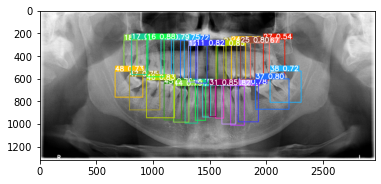

In [5]:
results = model(dataset[0][0])

plot = results[0].plot()

plt.imshow(plot)
plt.show()


In [6]:
from utils.data import LeyanDataset

data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-3'

root_dir = data_dir

dataset = LeyanDataset(root_dir=root_dir)

len(dataset)


71

In [7]:
for i in range(len(dataset)):
    img_name = dataset.img_paths[i].stem
    data = dataset[i]
    _, label, _ = data

    file_content = ''
    for key, xyxy in label.items():
        x1, x2, y1, y2 = xyxy.astype(int)

        text_line = f'{key} {x1} {x2} {y1} {y2} \n'

        file_content += text_line

    with open(f'gt/{img_name}.txt', 'w') as f:
        f.write(file_content)


# YOLOv8 eval

In [8]:
model = YOLO(YOLO_model_dir / 'enumerate.pt')
# model = YOLO(YOLO_model_dir / '8-bound-v8.pt')
results = model(dataset.img_paths)



0: 320x640 (no detections), 1: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 2 46s, 1 47, 2: 320x640 1 11, 1 12, 1 25, 1 26, 1 27, 1 33, 1 34, 1 42, 1 43, 2 44s, 1 45, 1 46, 3: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 4: 320x640 1 11, 1 12, 2 13s, 2 14s, 2 15s, 2 16s, 2 17s, 1 21, 1 22, 1 23, 1 27, 1 31, 1 32, 1 33, 1 34, 1 37, 1 41, 1 42, 1 43, 2 44s, 2 45s, 2 46s, 2 47s, 5: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 2 16s, 2 18s, 1 21, 1 22, 1 23, 1 24, 2 25s, 2 26s, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 2 47s, 1 48, 6: 320x640 1 11, 1 12, 1 13, 2 14s, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 

In [9]:
names = results[0].names

for i in range(len(results)):
    xyxy = results[i].boxes.xyxy
    conf = results[i].boxes.conf
    cls = results[i].boxes.cls

    file_content = ''
    for j in range(len(xyxy)):
        name = names[cls[j].int().item()]
        x1, x2, y1, y2 = xyxy[j].int()

        text_line = f'{name} {conf[j]:.6f} {x1} {x2} {y1} {y2} \n'
        file_content += text_line

    img_name = Path(results[i].path).stem
    with open(f'yolov8/{img_name}.txt', 'w') as f:
        f.write(file_content)


In [10]:
import torch
from utils.edge import bounding_teeth_on_origin

model = YOLO(YOLO_model_dir / '8-bound-v8.pt')
results = model(dataset.img_paths)

results



0: 320x640 (no detections), 1: 320x640 1 13, 1 17, 2 23s, 1 27, 1 33, 1 37, 1 43, 1 47, 2: 320x640 1 13, 1 27, 1 33, 3: 320x640 1 13, 2 17s, 1 23, 1 33, 1 37, 2 43s, 3 47s, 4: 320x640 2 13s, 2 17s, 2 23s, 2 33s, 1 37, 2 47s, 5: 320x640 1 13, 1 17, 1 23, 1 27, 1 33, 1 37, 1 43, 2 47s, 6: 320x640 1 13, 2 17s, 1 23, 1 27, 2 33s, 1 37, 1 43, 1 47, 7: 320x640 1 13, 1 17, 1 23, 2 27s, 1 33, 1 37, 1 43, 1 47, 8: 320x640 1 13, 2 17s, 1 23, 1 33, 1 37, 1 43, 1 47, 9: 320x640 1 13, 1 17, 1 23, 1 27, 1 33, 1 37, 1 43, 1 47, 10: 320x640 2 13s, 3 17s, 1 23, 1 33, 2 43s, 2 47s, 11: 320x640 1 13, 2 17s, 1 23, 1 27, 2 33s, 1 37, 2 43s, 2 47s, 12: 320x640 1 17, 1 23, 1 27, 2 33s, 2 37s, 1 47, 13: 320x640 1 13, 1 17, 2 23s, 1 27, 1 33, 1 37, 2 43s, 1 47, 14: 320x640 1 13, 2 17s, 1 23, 1 27, 2 33s, 2 47s, 15: 320x640 2 23s, 1 27, 2 33s, 2 37s, 1 43, 16: 320x640 2 23s, 2 33s, 1 43, 17: 320x640 3 13s, 1 23, 1 33, 1 37, 1 47, 18: 320x640 2 23s, 2 43s, 1 47, 19: 320x640 1 13, 1 17, 1 23, 2 27s, 2 33s, 1 37,

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '13', 1: '17', 2: '23', 3: '27', 4: '33', 5: '37', 6: '43', 7: '47'}
 orig_img: array([[[143, 143, 143],
         [ 83,  83,  83],
         [ 98,  98,  98],
         ...,
         [166, 166, 166],
         [167, 167, 167],
         [143, 143, 143]],
 
        [[136, 136, 136],
         [124, 124, 124],
         [123, 123, 123],
         ...,
         [151, 151, 151],
         [141, 141, 141],
         [120, 120, 120]],
 
        [[148, 148, 148],
         [130, 130, 130],
         [134, 134, 134],
         ...,
         [141, 141, 141],
         [121, 121, 121],
         [ 99,  99,  99]],
 
        ...,
 
        [[251, 251, 251],
         [237, 237, 237],
         [223, 223, 223],
         ...,
         [129, 129, 129],
         [106, 106, 106],
         [ 83,  83,  83]],
 
        [[255, 255, 255],
         [240, 240, 240],
         [

In [30]:
import cv2
from utils.yolo import get_teeth_ROI

teeth_region = bounding_teeth_on_origin(results, rotation_fix=False, yolov8=True)
# teeth_roi = get_teeth_ROI(results, yolov8=True)



error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
